# Introduction to Linear Regression

In this tutorial we will perform a simple linear regression. We will implement a solution both in scratch, using the concepts learned in class, and then we will make use of `scikit-learn`, a library that provides simple and efficient tools for data mining and data analysis.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

If you have an error about missing modules, try installing them in the command line:
```
conda install pandas
conda install numpy
conda install matplotlib
conda install sklearn
```

## Estimating ("Learning") Model Coefficients

Generally speaking, coefficients are estimated using the **least squares criterion**, which means we find the line (mathematically) which minimizes the **sum of squared residuals** (or "sum of squared errors"):

<img src="./img/estimating_coefficients.png">

What elements are present in the diagram?
- The black dots are the **observed values** of x and y.
- The blue line is our **least squares line**.
- The red lines are the **residuals**, which are the distances between the observed values and the least squares line.

How do the model coefficients relate to the least squares line?
- $\beta_0$ is the **intercept** (the value of $y$ when $x$=0)
- $\beta_1$ is the **slope** (the change in $y$ divided by change in $x$)

Here is a graphical depiction:

<img src="./img/slope_intercept.png">

## Linear Regression from scratch

For starters, it is useful to understand how to implement the model from scratch. Knowing how the packages work behind the scenes is important so you are not just blindly implementing the models.

To get started, let’s simulate some data and look at how the predicted values ($\hat{y}$) differ from the actual value ($y$):

In [2]:
# Generate 'random' data
np.random.seed(0)
X = 2.5 * np.random.randn(100) + 1.5   # Array of 100 values with mean = 1.5, stddev = 2.5
res = 0.5 * np.random.randn(100)       # Generate 100 residual terms
y = 2 + 0.3 * X + res                  # Actual values of Y

# Create pandas dataframe to store our X and y values
df = pd.DataFrame(
    {'X': X,
     'y': y}
)

# Show the first five rows of our dataframe
df.head()

,X,y
0,5.910131,4.714615
1,2.500393,2.076238
2,3.946845,2.548811
3,7.102233,4.615368
4,6.168895,3.264107


Visualise the generated data

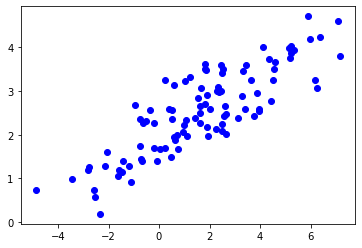

In [3]:
plt.plot(df.X,df.y,'bo')

The objective of the Ordinary Least Squares (OLS) method is to find values of $\beta_0$ (intercept) and $\beta_1$ (slope) that minimize the sum of the squared difference between $y$ and $\hat{y}$. We will not go through the derivation here, but using calculus we can show that the values of the unknown parameters are as follows:

$$\beta_1 = \frac {\sum_{i=1}^{n} (X_i - \overline{X})(y_i - \overline{y})}{\sum_{i=1}^{n} (X_i - \overline{X})^2}$$

$$\beta_0 = \hat{y} - \beta_1 * \overline{X}$$

Therefore, to estimate $y$ using the OLS method, we need to calculate `xmean` and `ymean`, the covariance of $X$ and $y$ (`xycov`), and the variance of $X$ (`xvar`) before we can determine the values for the intercept and the slope.

**Task**

In [4]:
# Calculate the mean of X and y
xmean = np.mean(X)
ymean = np.mean(y)

# Calculate the terms needed for the numerator and denominator of beta_1
df['xycov'] = (df['X'] - xmean) * (df['y'] - ymean)
df['xvar'] = (df['X'] - xmean)**2

# Calculate beta_0 and beta_1
slope = df['xycov'].sum() / df['xvar'].sum()
intercept = ymean - (slope * xmean)
print(f'intercept = {intercept}')
print(f'slope = {slope}')

intercept = 2.0031670124623426
slope = 0.3229396867092763


Great, we now have an estimate for $y$! Our model can be written as $\hat{y} = 2.003 + 0.323 X$, and we can make predictions.

**Task**: Make the predictions for the matrix $X$

In [5]:
ypred = intercept + slope * X
ypred

array([3.91178282, 2.81064315, 3.27775989, 4.29675991, 3.99534802,
       1.69857201, 3.25462968, 2.36537842, 2.40424288, 2.81907292,
       2.60387001, 3.66168312, 3.10199975, 2.58581077, 2.84592918,
       2.75696825, 3.69382011, 2.32194218, 2.74033151, 1.79802302,
       0.42642221, 3.015275  , 3.18547843, 1.88839019, 4.32006116,
       1.31339555, 2.52451965, 2.33645381, 3.72506464, 3.67386219,
       2.61267323, 2.79288576, 1.77082341, 0.88838207, 2.20668994,
       2.61380476, 3.48085076, 3.45831697, 2.17486854, 2.24351265,
       1.64102813, 1.34112617, 1.11002064, 4.06253353, 2.07610925,
       2.1338976 , 1.47613319, 3.11528277, 1.18459738, 2.31582084,
       1.76462232, 2.79994197, 2.07517841, 1.53439407, 2.46482364,
       2.83338994, 2.54127917, 2.73177699, 1.9754571 , 2.19471775,
       1.94466613, 2.19729158, 1.83108353, 1.09386364, 2.6308214 ,
       2.16319902, 1.17143718, 2.86120343, 1.75506992, 2.52951462,
       3.07620724, 2.59171079, 3.40747079, 1.49064088, 2.81240

Let’s plot our prediction `ypred` against the actual values of `y`, to get a better visual understanding of our model.

**Remark**: do not worry if you do not understand the code to plot the data. In tomorrow's extra material you will find an introduction to visualization with `matplotlib`, `seaborn` and `folium`.

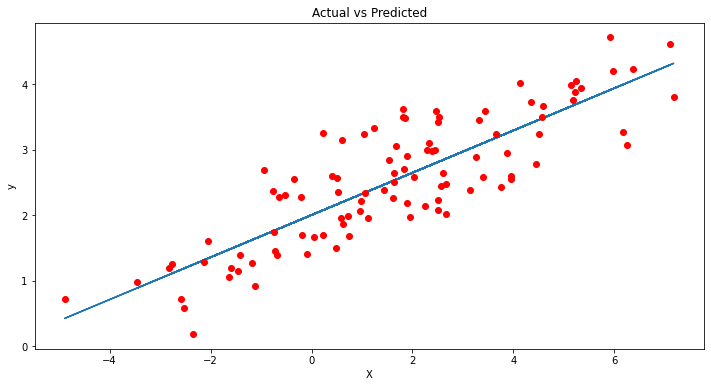

In [6]:
# Plot regression against actual data
plt.figure(figsize=(12, 6))
plt.plot(X, ypred)     # regression line
plt.plot(X, y, 'ro')   # scatter plot showing actual data
plt.title('Actual vs Predicted')
plt.xlabel('X')
plt.ylabel('y')

plt.show()

The blue line is our line of best fit, $\hat{y} = 2.003 + 0.323 X$. We can see from this graph that there is a positive linear relationship between $X$ and $y$. Using our model, we can predict $y$ from any values of $X$!

**Task**: Predict the result for x = 10:

In [7]:
x = 10
pred = intercept + slope * x

print(f'x = {x} --> y = {pred}')

x = 10 --> y = 5.232563879555106


## Linear Regression with scikit-learn

Now that we have seen how to implement a simple linear regression from scratch, we will use `scikit-learn`, a library that has implementations of this and other Machine Learning algorithms.

Since the algorithms implemented by the library assume multiple variables, we have to reshape our input variable $X$ from an array to a matrix of _len(X)_ rows and 1 column.

In [8]:
X_2 = X.reshape(-1, 1)
X.shape, X_2.shape

((100,), (100, 1))

**Scikit-learn** provides an easy way to train the model, via the `LinearRegression` interface.

**Task**: Create a linear regression model and train it (check the function `.fit()`) using X and y.

Check https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html for detailed information.

In [9]:
# Initialize and fit model
lm = LinearRegression()
model = lm.fit(X_2, y)

There is no need to calculate the values for the intercept and the slope ourselves. Find out how to find these values by looking at the model attributes (_Hint:_ check https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [10]:
print(f'intercept = {model.intercept_}')
print(f'slope = {model.coef_}')

intercept = 2.003167012462343
slope = [0.32293969]


`scikit-learn` also allows to easily predict values by using `.predict()`. 

**Task**: Make the predictions for the training data.

In [11]:
ypred = model.predict(X_2)
ypred

array([3.91178282, 2.81064315, 3.27775989, 4.29675991, 3.99534802,
       1.69857201, 3.25462968, 2.36537842, 2.40424288, 2.81907292,
       2.60387001, 3.66168312, 3.10199975, 2.58581077, 2.84592918,
       2.75696825, 3.69382011, 2.32194218, 2.74033151, 1.79802302,
       0.42642221, 3.015275  , 3.18547843, 1.88839019, 4.32006116,
       1.31339555, 2.52451965, 2.33645381, 3.72506464, 3.67386219,
       2.61267323, 2.79288576, 1.77082341, 0.88838207, 2.20668994,
       2.61380476, 3.48085076, 3.45831697, 2.17486854, 2.24351265,
       1.64102813, 1.34112617, 1.11002064, 4.06253353, 2.07610925,
       2.1338976 , 1.47613319, 3.11528277, 1.18459738, 2.31582084,
       1.76462232, 2.79994197, 2.07517841, 1.53439407, 2.46482364,
       2.83338994, 2.54127917, 2.73177699, 1.9754571 , 2.19471775,
       1.94466613, 2.19729158, 1.83108353, 1.09386364, 2.6308214 ,
       2.16319902, 1.17143718, 2.86120343, 1.75506992, 2.52951462,
       3.07620724, 2.59171079, 3.40747079, 1.49064088, 2.81240

Let's again visualize the output of our model's predictions

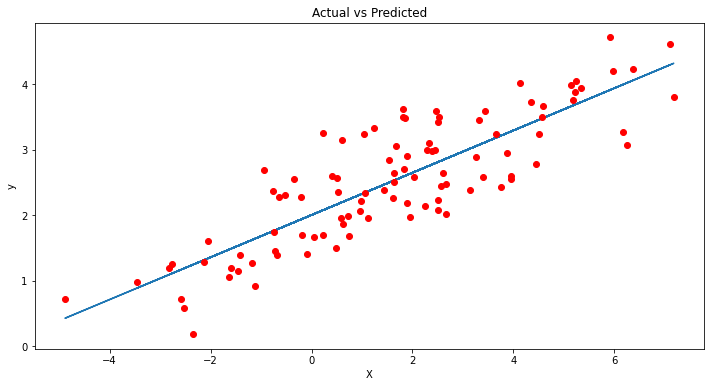

In [12]:
# Plot regression against actual data
plt.figure(figsize=(12, 6))
plt.plot(X, ypred)     # regression line
plt.plot(X, y, 'ro')   # scatter plot showing actual data
plt.title('Actual vs Predicted')
plt.xlabel('X')
plt.ylabel('y')

plt.show()

**Task**: Let's make a prediction for x=10

In [13]:
x = [[10]]
pred = model.predict(x)

print(f'x = {x} --> y = {pred}')

x = [[10]] --> y = [5.23256388]


**Well done!**

In following notebooks we will implement Linear Regression models with multiple variables, as well as Logistic Regression and more advanced Machine Learning algorithms. Keep it up!